<u>**SMA Project Check list**</u>: <br>
https://www.notion.so/mekongdelta/SMA-project-checklist-1bd9d61bcb894b7eaa7e3958d6a1bbae

# Problem Statement

TO BE ADDED AFTERWARDS

This would be testing the below strategy on the historical data. We are assuming we have data till March 2023 and we are applying the strategy on the stocks from the April 2023 onwards and comparing the growth of the portfolio with the general NIFTY mutual fund like SBI NIFTY 50 mutual fund.

Beating the nifty index mutual fund by selecting few stocks from the nifty 50
* putting same amount in SBI nifty index and your portfoliio( selected stocks from nifty 50 ) on 1st of the month for 1 year( Apr,1,2024 to 28, Mar 2024 ) and tracking the loss and changes.

# Data Sources

In [1]:
# install main library YFinance
!pip install yfinance

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 3.7 MB/s eta 0:00:00a 0:00:01
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.5/73.5 kB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.2/112.2 kB 78.8 kB/s eta 0:00:00 0:00:01
  Created wheel for peewee: filename=peewee-3.17.6-py3-none-any.whl size=138889 sha256=a797ff8961d6914e8387f8ef540f918ef8163fcf51af1b1ae02c2ba286d06dc1
  Stored in directory: /home/pkn/.cache/pip/wheels/1c/09/7e/9f659fde248ecdc1722a142c1d744271aad3914a0afc191058
Successfully built peewee


In [3]:
!pip install pandas_datareader

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 109.5/109.5 kB 186.3 kB/s eta 0:00:00a 0:00:01


In [4]:
# IMPORTS
import numpy as np
import pandas as pd

#Fin Data Sources
import yfinance as yf
import pandas_datareader as pdr

#Data viz
import plotly.graph_objs as go
import plotly.express as px

import time
from datetime import date

# for graphs
import matplotlib.pyplot as plt


## Helper Functions

### retrieving the growth for the given data frame

In [3]:
def get_growth_df(df:pd.DataFrame, prefix:str)->pd.DataFrame:
  for i in [1,3,7,30,90,180,365]:
    df['growth_'+prefix+'_'+str(i)+'d'] = df['Adj Close'] / df['Adj Close'].shift(i)
    GROWTH_KEYS = [k for k in df.keys() if k.startswith('growth')]
  return df[GROWTH_KEYS]

## Selecting the period for the observation

`NOTE`: The date for which the yfincae has the data for nifty 50 is from 17,9,2007. So we are changing the period of observation from `April 1, 2024` to `April 1,2009` which is just after the 2008 financial crisis

In [4]:
# Set end to the last date of March 2024
end = date(year=2024, month=3, day=31)
print(f'Year = {end.year}; month= {end.month}; day={end.day}')

# Set start to April 1, 2009
start = date(year=2009, month=4, day=1)
print(f'Period for indexes: {start} to {end} ')

Year = 2024; month= 3; day=31
Period for indexes: 2009-04-01 to 2024-03-31 


## list of stocks in nifty 50

`TO be checked every quarter`

Official site:

* Website for the list: https://www.nseindia.com/products-services/indices-nifty50-index

* CSV download link: https://nsearchives.nseindia.com/content/indices/ind_nifty50list.csv

3rd party site:
Extract from the site:
* https://www.equitymaster.com/india-markets/nse-replica.asp?order=researchText.no_shares_act%20desc

In [ ]:
import requests
from bs4 import BeautifulSoup
import csv


In [ ]:
url = "https://www.equitymaster.com/india-markets/nse-replica.asp?order=researchText.no_shares_act%20desc"
headers = {
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.3"
}

response = requests.get(url, headers=headers)


In [ ]:
# Parse the HTML content of the webpage
soup = BeautifulSoup(response.content, "html.parser")

In [ ]:
# You need to be able to find this table tag and read all behind it
# Find the div with class "mystocksbig mystocks newtab cls"
table = soup.find('table', {'class': 'mystocksbig mystocks newtab cls'})

In [ ]:
type(table)

bs4.element.Tag

In [ ]:
# Extract headers
headers = []
for th in table.find('thead').find_all('th'):
    headers.append(th.get_text(strip=True))

In [ ]:
headers.remove('Based on Equitymaster Estimatesand Publicly Available Information')
headers[3:]

['COMPANY',
 'INDUSTRY',
 'MARKET PRICE(Rs)',
 'CHANGE(%)',
 'NO OFSHARES(m)',
 'MARKET CAP.**(Rs m)',
 'FREE FLOATADJ. FACTOR#',
 'EARNINGS *(Rs m)',
 'EPS(Rs)',
 'PER(X)']

In [ ]:
selected_headers  = ['COMPANY', 'INDUSTRY']

In [ ]:
# Extract rows
rows = []
for tr in table.find('tbody').find_all('tr'):
    cells = tr.find_all('td')
    row = [cell.get_text(strip=True) for cell in cells]
    rows.append(row)

In [ ]:
# Write to CSV
csv_filename = 'stocks_data.csv'
with open(csv_filename, 'w', newline='', encoding='utf-8') as csvfile:
    csvwriter = csv.writer(csvfile)
    csvwriter.writerow(headers[3:])  # Write headers
    csvwriter.writerows(rows)    # Write data rows

print(f"Data has been written to {csv_filename}")

Data has been written to stocks_data.csv


In [ ]:
nifty50__updated_list = pd.read_csv('./stocks_data.csv', sep=',')
nifty50__updated_list

,COMPANY,INDUSTRY,MARKET PRICE(Rs),CHANGE(%),NO OFSHARES(m),MARKET CAP.**(Rs m),FREE FLOATADJ. FACTOR#,EARNINGS *(Rs m),EPS(Rs),PER(X)
0,IOC,ENERGY,167.0,-4.2,"14,121.2","2,358,812",0.5,"416,152",29.5,5.7
1,ONGC,ENERGY,307.1,0.8,"12,580.3","3,863,404",0.4,"538,153",42.8,7.2
2,ITC,FOOD & TOBACCO,459.1,0.1,"12,495.9","5,736,231",1.0,"207,238",16.6,27.7
3,TATA STEEL,STEEL,168.7,-0.1,"12,483.5","2,105,834",0.7,"-48,516",-3.9,-
4,NTPC,POWER,377.2,0.0,"9,696.7","3,657,098",0.5,"186,967",19.3,19.6
5,POWER GRID,POWER,343.1,0.1,"9,300.6","3,191,037",0.5,"161,641",17.4,19.7
6,SBI,BANKING,859.7,0.4,"8,924.6","7,672,489",0.4,"681,383",76.3,11.3
7,HDFC BANK,BANKING,"1,622.7",0.1,"7,608.1","12,345,700",1.0,"654,465",86.0,18.9
8,ICICI BANK,BANKING,"1,232.9",-0.5,"7,037.6","8,676,609",1.0,"450,067",64.0,19.3
9,RELIANCE IND.,ENERGY,"3,193.5",1.0,"6,766.2","21,607,614",0.5,"786,330",116.2,27.5


## Daily OHCLV data for a set of stocks

In [ ]:
stock = nifty50__updated_list['COMPANY'][0]
stock = "IOC.NS"

In [ ]:
ioc_df = yf.download(tickers = stock, # stock name should be according to the y.finance
                     period = "max",
                     interval = "1d")

[*********************100%%**********************]  1 of 1 completed


In [ ]:
ioc_df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1996-04-15,18.055555,18.055555,17.222221,17.222221,4.92409,43200
1996-04-16,17.222221,17.222221,17.222221,17.222221,4.92409,0
1996-04-17,17.222221,17.222221,17.222221,17.222221,4.92409,3600
1996-04-18,17.222221,18.055555,17.222221,17.222221,4.92409,14400
1996-04-19,17.222221,17.222221,17.222221,17.222221,4.92409,7200


In [ ]:
ioc_df.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2024-07-08,172.210007,172.809998,169.750000,170.070007,163.245361,30322381
2024-07-09,171.289993,172.699997,170.500000,171.669998,164.781158,28600182
2024-07-10,172.300003,172.490005,167.199997,171.899994,165.001923,34673112
2024-07-11,172.899994,175.800003,172.250000,174.440002,167.440002,55143055
2024-07-12,168.490005,169.250000,166.110001,167.039993,167.039993,35355791


In [ ]:
start, type(start), end, type(end)

(datetime.date(2009, 4, 1),
 datetime.date,
 datetime.date(2024, 3, 31),
 datetime.date)

In [ ]:
# filter on date (index) period
ioc_df_filtered_from_2009 = ioc_df[(ioc_df.index >= '2009-04-01') & (ioc_df.index <= '2023-03-31')] # from 1st april 2009 to march 31st, 2023
ioc_df_filtered_from_2023 = ioc_df[ioc_df.index >= '2023-04-01'] # march 31st, 2023

<Axes: title={'center': 'Novo Nordisk A/S (NVO) price daily'}, xlabel='Date'>

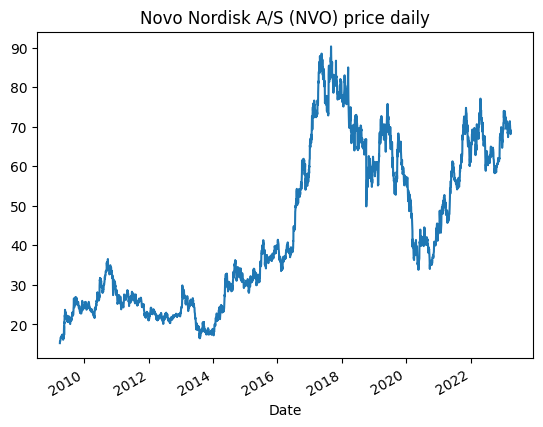

In [ ]:
# Chaining: select one column, draw a plot, of a type line
ioc_df_filtered_from_2009['Adj Close'].plot.line(title='Novo Nordisk A/S (NVO) price daily')

In [ ]:
# generating new fields (using DateTime features):

ioc_df['Ticker'] = 'NVO'
ioc_df['Year']= ioc_df.index.year
ioc_df['Month'] = ioc_df.index.month
ioc_df['Weekday'] = ioc_df.index.weekday
ioc_df['Date'] = ioc_df.index.date # to be used in joins

In [ ]:
# shift ALL values (on x periods forward (+1) and backward (-1))
# equivalent of joining with a dataframe of the same vector, but with shifted date index
ioc_df['adj_close_minus_1'] = ioc_df['Adj Close'].shift(-1)
ioc_df['adj_close_plus_1'] = ioc_df['Adj Close'].shift(1)

In [ ]:
ioc_df.tail()

,Open,High,Low,Close,Adj Close,Volume,Ticker,Year,Month,Weekday,Date,adj_close_minus_1,adj_close_plus_1
Date,,,,,,,,,,,,,
2024-07-08,172.210007,172.809998,169.750000,170.070007,163.245361,30322381,NVO,2024,7,0,2024-07-08,164.781158,164.406799
2024-07-09,171.289993,172.699997,170.500000,171.669998,164.781158,28600182,NVO,2024,7,1,2024-07-09,165.001923,163.245361
2024-07-10,172.300003,172.490005,167.199997,171.899994,165.001923,34673112,NVO,2024,7,2,2024-07-10,167.440002,164.781158
2024-07-11,172.899994,175.800003,172.250000,174.440002,167.440002,55143055,NVO,2024,7,3,2024-07-11,167.039993,165.001923
2024-07-12,168.490005,169.250000,166.110001,167.039993,167.039993,35355791,NVO,2024,7,4,2024-07-12,NaN,167.440002


In [ ]:

# historical growth
ioc_df['growth_1d'] = ioc_df['Adj Close'] / ioc_df['Adj Close'].shift(1)           # ioc_df['adj_close_plus_1']
ioc_df['growth_30d'] = ioc_df['Adj Close'] / ioc_df['Adj Close'].shift(30)

In [ ]:
# FUTURE Growth : for regression models
ioc_df['growth_future_1d'] = ioc_df['Adj Close'].shift(-1) / ioc_df['Adj Close']   # ioc_df['adj_close_minus_1']

In [ ]:
# FUTURE Growth: for binary models
ioc_df['is_positive_growth_1d_future'] = np.where(ioc_df['growth_future_1d'] > 1, 1, 0)

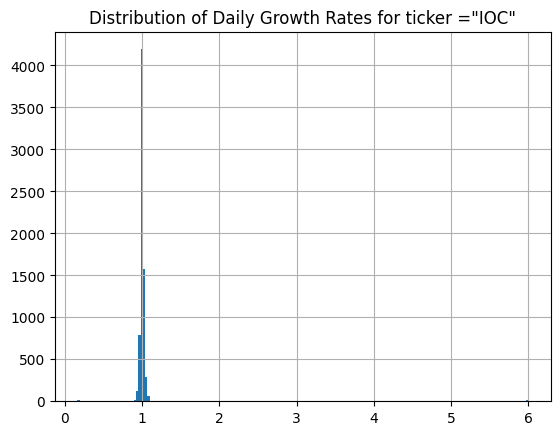

In [ ]:
# normally the growth in 1 day is +-10%, while a lot of it is around 0% (around 1.)
plt.title('Distribution of Daily Growth Rates for ticker ="IOC"')
ioc_df.growth_1d.hist(bins=200)
plt.show()


<Axes: title={'center': 'Distribution of 2-days Growth Rates for ticker = "IOC"'}>

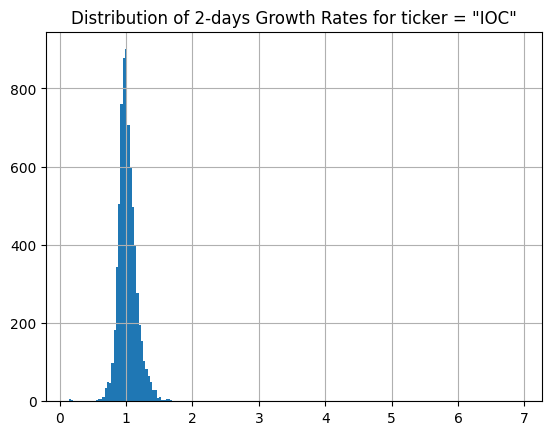

In [ ]:
# you can see that the growth is can be much wider in 30 days (+- 30%)
plt.title('Distribution of 2-days Growth Rates for ticker = "IOC"')
ioc_df.growth_30d.hist(bins=200)

In [ ]:
# for modeling: we use growth_1d, growth_2d as feature
COLUMNS = [k for k in ioc_df.keys() if k.find('growth')>=0 or k=='Adj Close']
ioc_df[COLUMNS].tail()

,Adj Close,growth_1d,growth_30d,growth_future_1d,is_positive_growth_1d_future
Date,,,,,
2024-07-08,163.245361,0.992936,1.007524,1.009408,1
2024-07-09,164.781158,1.009408,1.016400,1.001340,1
2024-07-10,165.001923,1.001340,1.029033,1.014776,1
2024-07-11,167.440002,1.014776,1.056892,0.997611,0
2024-07-12,167.039993,0.997611,1.074549,NaN,0


In [ ]:
# Calculate the distribution if future growth
ioc_df.is_positive_growth_1d_future.value_counts() / len(ioc_df)

is_positive_growth_1d_future
0    0.515515
1    0.484485
Name: count, dtype: float64

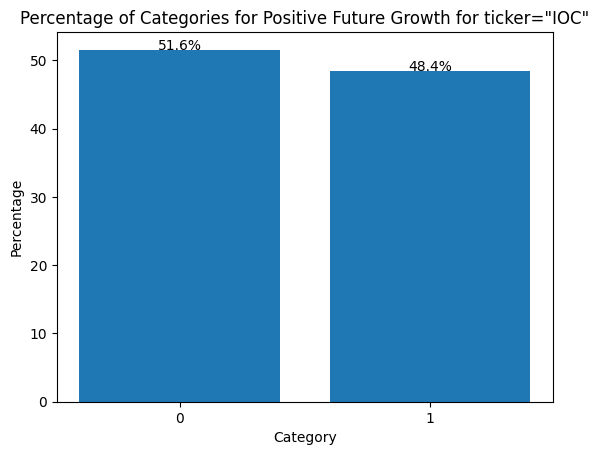

In [ ]:
# Calculate value counts
value_counts = ioc_df['is_positive_growth_1d_future'].value_counts()

# Calculate percentage of each category
percentage = (value_counts / len(ioc_df)) * 100

# Plot as a bar chart
plt.bar(percentage.index.astype(str), percentage)
plt.xlabel('Category')
plt.ylabel('Percentage')
plt.title('Percentage of Categories for Positive Future Growth for ticker="IOC"')

# Add percentage values on top of each bar
for i, value in enumerate(percentage):
    plt.text(i, value + 0, f'{value:.1f}%', ha='center')

plt.show()

In [ ]:
company_lsit_from_website = nifty50__updated_list['COMPANY'].to_list()
company_lsit_from_website[:10]

['IOC',
 'ONGC',
 'ITC',
 'TATA STEEL',
 'NTPC',
 'POWER GRID',
 'SBI',
 'HDFC BANK',
 'ICICI BANK',
 'RELIANCE IND.']

* Copied the names of the company on a excel sheet.
* Then copied it to google sheet, added a col.
* and then copied the corresponding symbol according to the yahoo finance website.

In [ ]:
company_names_yahoo_api = ['IOC.NS','ONGC.NS','ITC.NS','TATASTEEL.NS','NTPC.NS','POWERGRID.NS','SBIN.NS',
                           'HDFCBANK.NS','ICICIBANK.NS', 'RELIANCE.NS','COALINDIA.NS','BHARTIARTL.NS','WIPRO.NS',
                           'BPCL.NS','INFY.NS','TCS.NS','TATAMTRDVR.NS','AXISBANK.NS','HCLTECH.NS','JSWSTEEL.NS',
                           'SUNPHARMA.NS','HINDUNILVR.NS','HINDALCO.NS','ADANIPORTS.NS','HDFCLIFE.NS','KOTAKBANK.NS',
                           'BAJAJFINSV.NS','LT.NS','M&M.NS','ADANIENT.NS','SBILIFE.NS','TECHM.NS','NESTLEIND.NS','ASIANPAINT.NS',
                           'TATACONSUM.NS','TITAN.NS','CIPLA.NS','INDUSINDBK.NS','GRASIM.NS','BAJFINANCE.NS','SHRIRAMFIN.NS',
                           'MARUTI.NS','LTIM.NS','ULTRACEMCO.NS','BAJAJ-AUTO.NS','EICHERMOT.NS','DIVISLAB.NS','HEROMOTOCO.NS',
                           'DRREDDY.NS','APOLLOHOSP.NS',]

In [ ]:
company_names_yahoo_api[:10]

['IOC.NS',
 'ONGC.NS',
 'ITC.NS',
 'TATASTEEL.NS',
 'NTPC.NS',
 'POWERGRID.NS',
 'SBIN.NS',
 'HDFCBANK.NS',
 'ICICIBANK.NS',
 'RELIANCE.NS']

In [ ]:
ALL_TICKERS = company_names_yahoo_api

In [ ]:
import time

stocks_df = pd.DataFrame({'A' : []})

for i,ticker in enumerate(ALL_TICKERS):
  print(i,ticker)

  # Work with stock prices
  historyPrices = yf.download(tickers = ticker,
                    #  period = "max",
                              start = start,
                              end = end,
                     interval = "1d")

  # generate features for historical prices, and what we want to predict
  historyPrices['Ticker'] = ticker
  historyPrices['Year']= historyPrices.index.year
  historyPrices['Month'] = historyPrices.index.month
  historyPrices['Weekday'] = historyPrices.index.weekday
  historyPrices['Date'] = historyPrices.index.date

  # historical returns
  for i in [1,3,7,30,90,180,365]: # adding the 180 days which is half yearly
    historyPrices['growth_'+str(i)+'d'] = historyPrices['Adj Close'] / historyPrices['Adj Close'].shift(i)
  historyPrices['growth_future_5d'] = historyPrices['Adj Close'].shift(-5) / historyPrices['Adj Close']

  # Technical indicators
  # SimpleMovingAverage 10 days and 20 days
  historyPrices['SMA10']= historyPrices['Close'].rolling(10).mean()
  historyPrices['SMA20']= historyPrices['Close'].rolling(20).mean()
  historyPrices['growing_moving_average'] = np.where(historyPrices['SMA10'] > historyPrices['SMA20'], 1, 0)
  historyPrices['high_minus_low_relative'] = (historyPrices.High - historyPrices.Low) / historyPrices['Adj Close']

  # 30d rolling volatility : https://ycharts.com/glossary/terms/rolling_vol_30
  historyPrices['volatility'] =   historyPrices['Adj Close'].rolling(30).std() * np.sqrt(252)

  # what we want to predict
  historyPrices['is_positive_growth_5d_future'] = np.where(historyPrices['growth_future_5d'] > 1, 1, 0)

  # sleep 1 sec between downloads - not to overload the API server
  time.sleep(1)


  if stocks_df.empty:
    stocks_df = historyPrices
  else:
    stocks_df = pd.concat([stocks_df, historyPrices], ignore_index=True)

0 IOC.NS


[*********************100%%**********************]  1 of 1 completed


1 ONGC.NS


[*********************100%%**********************]  1 of 1 completed


2 ITC.NS


[*********************100%%**********************]  1 of 1 completed


3 TATASTEEL.NS


[*********************100%%**********************]  1 of 1 completed


4 NTPC.NS


[*********************100%%**********************]  1 of 1 completed


5 POWERGRID.NS


[*********************100%%**********************]  1 of 1 completed


6 SBIN.NS


[*********************100%%**********************]  1 of 1 completed


7 HDFCBANK.NS


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed

8 ICICIBANK.NS



[*********************100%%**********************]  1 of 1 completed

9 RELIANCE.NS



[*********************100%%**********************]  1 of 1 completed

10 COALINDIA.NS


11 BHARTIARTL.NS


[*********************100%%**********************]  1 of 1 completed


12 WIPRO.NS


[*********************100%%**********************]  1 of 1 completed


13 BPCL.NS


[*********************100%%**********************]  1 of 1 completed


14 INFY.NS


[*********************100%%**********************]  1 of 1 completed


15 TCS.NS


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed

16 TATAMTRDVR.NS



[*********************100%%**********************]  1 of 1 completed

17 AXISBANK.NS


18 HCLTECH.NS


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed

19 JSWSTEEL.NS


20 SUNPHARMA.NS


[*********************100%%**********************]  1 of 1 completed


21 HINDUNILVR.NS


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed

22 HINDALCO.NS



[*********************100%%**********************]  1 of 1 completed

23 ADANIPORTS.NS



[*********************100%%**********************]  1 of 1 completed

24 HDFCLIFE.NS


25 KOTAKBANK.NS


[*********************100%%**********************]  1 of 1 completed


26 BAJAJFINSV.NS


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed

27 LT.NS


28 M&M.NS


[*********************100%%**********************]  1 of 1 completed


29 ADANIENT.NS


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed

30 SBILIFE.NS



[*********************100%%**********************]  1 of 1 completed

31 TECHM.NS



[*********************100%%**********************]  1 of 1 completed

32 NESTLEIND.NS


33 ASIANPAINT.NS


[*********************100%%**********************]  1 of 1 completed


34 TATACONSUM.NS


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed

35 TITAN.NS



[*********************100%%**********************]  1 of 1 completed

36 CIPLA.NS



[*********************100%%**********************]  1 of 1 completed

37 INDUSINDBK.NS



[*********************100%%**********************]  1 of 1 completed

38 GRASIM.NS


39 BAJFINANCE.NS


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed

40 SHRIRAMFIN.NS



[*********************100%%**********************]  1 of 1 completed

41 MARUTI.NS



[*********************100%%**********************]  1 of 1 completed

42 LTIM.NS



[*********************100%%**********************]  1 of 1 completed

43 ULTRACEMCO.NS



[*********************100%%**********************]  1 of 1 completed

44 BAJAJ-AUTO.NS


45 EICHERMOT.NS


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed

46 DIVISLAB.NS



[*********************100%%**********************]  1 of 1 completed

47 HEROMOTOCO.NS



[*********************100%%**********************]  1 of 1 completed

48 DRREDDY.NS


49 APOLLOHOSP.NS


[*********************100%%**********************]  1 of 1 completed


In [ ]:
# unique tickers
stocks_df.Ticker.nunique()

50

In [ ]:
# count of observations by stock
stocks_df.Ticker.value_counts()

Ticker
HCLTECH.NS       3700
IOC.NS           3699
ONGC.NS          3699
LT.NS            3699
M&M.NS           3699
ADANIENT.NS      3699
TECHM.NS         3699
NESTLEIND.NS     3699
ASIANPAINT.NS    3699
TATACONSUM.NS    3699
TITAN.NS         3699
CIPLA.NS         3699
INDUSINDBK.NS    3699
GRASIM.NS        3699
BAJFINANCE.NS    3699
SHRIRAMFIN.NS    3699
MARUTI.NS        3699
ULTRACEMCO.NS    3699
BAJAJ-AUTO.NS    3699
EICHERMOT.NS     3699
DIVISLAB.NS      3699
HEROMOTOCO.NS    3699
DRREDDY.NS       3699
BAJAJFINSV.NS    3699
KOTAKBANK.NS     3699
WIPRO.NS         3699
ADANIPORTS.NS    3699
ITC.NS           3699
TATASTEEL.NS     3699
NTPC.NS          3699
POWERGRID.NS     3699
SBIN.NS          3699
HDFCBANK.NS      3699
ICICIBANK.NS     3699
RELIANCE.NS      3699
BHARTIARTL.NS    3699
APOLLOHOSP.NS    3699
BPCL.NS          3699
INFY.NS          3699
TCS.NS           3699
TATAMTRDVR.NS    3699
AXISBANK.NS      3699
JSWSTEEL.NS      3699
SUNPHARMA.NS     3699
HINDUNILVR.NS    3699
HIN

In [ ]:
stocks_df.groupby(['Ticker']).Date.agg(['min','max'])

,min,max
Ticker,,
ADANIENT.NS,2009-04-01,2024-03-28
ADANIPORTS.NS,2009-04-01,2024-03-28
APOLLOHOSP.NS,2009-04-01,2024-03-28
ASIANPAINT.NS,2009-04-01,2024-03-28
AXISBANK.NS,2009-04-01,2024-03-28
BAJAJ-AUTO.NS,2009-04-01,2024-03-28
BAJAJFINSV.NS,2009-04-01,2024-03-28
BAJFINANCE.NS,2009-04-01,2024-03-28
BHARTIARTL.NS,2009-04-01,2024-03-28


## Checking which stocks don't have all the values for the given observation period.

In [ ]:
# Group by 'Ticker' and aggregate min and max dates
date_range_df = stocks_df.groupby('Ticker').Date.agg(['min', 'max']).reset_index()

In [ ]:
date_range_df['min'][0]

datetime.date(2009, 4, 1)

In [ ]:
import datetime as dt

In [ ]:
date_range_df[(date_range_df['min'] != dt.date(2009, 4, 1))]
# date_range_df[(date_range_df['min'] != '2009-04-01') | (date_range_df['max'] != '2024-03-28')]

,Ticker,min,max
11,COALINDIA.NS,2010-11-04,2024-03-28
18,HDFCLIFE.NS,2017-11-17,2024-03-28
30,LTIM.NS,2016-07-21,2024-03-28
38,SBILIFE.NS,2017-10-03,2024-03-28


In [ ]:
filtered_tickers = date_range_df[(date_range_df['min'] != dt.date(2009, 4, 1)) | (date_range_df['max'] != dt.date(2024, 3, 28))]['Ticker']
filtered_tickers

11    COALINDIA.NS
18     HDFCLIFE.NS
30         LTIM.NS
38      SBILIFE.NS
Name: Ticker, dtype: object

In [ ]:
# Filter the original dataframe based on the tickers
filtered_stocks_df = stocks_df[stocks_df['Ticker'].isin(filtered_tickers)]

In [ ]:
filtered_stocks_df.Ticker.unique()

array(['COALINDIA.NS', 'HDFCLIFE.NS', 'SBILIFE.NS', 'LTIM.NS'],
      dtype=object)

In [ ]:
stocks_df['Date'] = pd.to_datetime(stocks_df['Date'])

In [ ]:
# stocks_df.info()

In [ ]:
# data before the start date
stocks_df[(stocks_df.Date<'2009-04-01')].shape

(0, 25)

In [ ]:
# data start and 31 mar 2023
stocks_df[(stocks_df.Date>='2009-04-01') & (stocks_df.Date<='2023-03-31')].shape

(166381, 25)

In [ ]:
stocks_df[(stocks_df.Date>='2009-04-01') & (stocks_df.Date<='2023-03-31')].info()

<class 'pandas.core.frame.DataFrame'>
Index: 166381 entries, 0 to 178287
Data columns (total 25 columns):
 #   Column                        Non-Null Count   Dtype         
---  ------                        --------------   -----         
 0   Open                          166381 non-null  float64       
 1   High                          166381 non-null  float64       
 2   Low                           166381 non-null  float64       
 3   Close                         166381 non-null  float64       
 4   Adj Close                     166381 non-null  float64       
 5   Volume                        166381 non-null  int64         
 6   Ticker                        166381 non-null  object        
 7   Year                          166381 non-null  int32         
 8   Month                         166381 non-null  int32         
 9   Weekday                       166381 non-null  int32         
 10  Date                          166381 non-null  datetime64[ns]
 11  growth_1d         

In [ ]:
# data from end onwards from 31st mar 2023
stocks_df[(stocks_df.Date>='2023-03-31')].shape

(12200, 25)

In [ ]:
stocks_df[(stocks_df.Date>='2023-03-31')].info()

<class 'pandas.core.frame.DataFrame'>
Index: 12200 entries, 3455 to 178530
Data columns (total 25 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   Open                          12200 non-null  float64       
 1   High                          12200 non-null  float64       
 2   Low                           12200 non-null  float64       
 3   Close                         12200 non-null  float64       
 4   Adj Close                     12200 non-null  float64       
 5   Volume                        12200 non-null  int64         
 6   Ticker                        12200 non-null  object        
 7   Year                          12200 non-null  int32         
 8   Month                         12200 non-null  int32         
 9   Weekday                       12200 non-null  int32         
 10  Date                          12200 non-null  datetime64[ns]
 11  growth_1d                    

## Nifty 50 data

In [ ]:
nifty_50_df = yf.download(tickers = "^NSEI",
            start=start,
            end = end,
            interval = "1d")

[*********************100%%**********************]  1 of 1 completed


In [ ]:
nifty_50_df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2009-04-01,3023.850098,3069.300049,2965.699951,3060.350098,3060.350098,0
2009-04-02,3061.050049,3228.750000,3061.050049,3211.050049,3211.050049,0
2009-04-06,3211.350098,3303.899902,3211.350098,3256.600098,3256.600098,0
2009-04-08,3255.350098,3357.050049,3149.250000,3342.949951,3342.949951,0
2009-04-09,3346.000000,3401.149902,3307.050049,3342.050049,3342.050049,0


Before the change:

|Date|Open|High|Low|Close|Adj Close|Volume|
|---|---|---|---|---|---|---|
|2007-09-17 00:00:00|4518\.4501953125|4549\.0498046875|4482\.85009765625|4494\.64990234375|4494\.64990234375|0|
|2007-09-18 00:00:00|4494\.10009765625|4551\.7998046875|4481\.5498046875|4546\.2001953125|4546\.2001953125|0|
|2007-09-19 00:00:00|4550\.25|4739\.0|4550\.25|4732\.35009765625|4732\.35009765625|0|
|2007-09-20 00:00:00|4734\.85009765625|4760\.85009765625|4721\.14990234375|4747\.5498046875|4747\.5498046875|0|
|2007-09-21 00:00:00|4752\.9501953125|4855\.7001953125|4733\.7001953125|4837\.5498046875|4837\.5498046875|0|

---

After the change:

|Date|Open|High|Low|Close|Adj Close|Volume|
|---|---|---|---|---|---|---|
|2009-04-01 00:00:00|3023\.85009765625|3069\.300048828125|2965\.699951171875|3060\.35009765625|3060\.35009765625|0|
|2009-04-02 00:00:00|3061\.050048828125|3228\.75|3061\.050048828125|3211\.050048828125|3211\.050048828125|0|
|2009-04-06 00:00:00|3211\.35009765625|3303\.89990234375|3211\.35009765625|3256\.60009765625|3256\.60009765625|0|
|2009-04-08 00:00:00|3255\.35009765625|3357\.050048828125|3149\.25|3342\.949951171875|3342\.949951171875|0|
|2009-04-09 00:00:00|3346\.0|3401\.14990234375|3307\.050048828125|3342\.050048828125|3342\.050048828125|0|



In [ ]:
nifty_50_df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2009-04-01,3023.850098,3069.300049,2965.699951,3060.350098,3060.350098,0
2009-04-02,3061.050049,3228.750000,3061.050049,3211.050049,3211.050049,0
2009-04-06,3211.350098,3303.899902,3211.350098,3256.600098,3256.600098,0
2009-04-08,3255.350098,3357.050049,3149.250000,3342.949951,3342.949951,0
2009-04-09,3346.000000,3401.149902,3307.050049,3342.050049,3342.050049,0


In [ ]:
nifty_50_df.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2024-03-21,21989.900391,22080.949219,21941.300781,22011.949219,22011.949219,353200
2024-03-22,21932.199219,22180.699219,21883.300781,22096.750000,22096.750000,388700
2024-03-26,21947.900391,22073.199219,21947.550781,22004.699219,22004.699219,328400
2024-03-27,22053.949219,22193.599609,22052.849609,22123.650391,22123.650391,409100
2024-03-28,22163.599609,22516.000000,22163.599609,22326.900391,22326.900391,410500


In [ ]:
nifty_50_to_merge = get_growth_df(nifty_50_df,'nifty')
nifty_50_to_merge.tail(2)

,growth_nifty_1d,growth_nifty_3d,growth_nifty_7d,growth_nifty_30d,growth_nifty_90d,growth_nifty_180d,growth_nifty_365d
Date,,,,,,,
2024-03-27,1.005406,1.005075,1.004554,1.023483,1.137840,1.141041,1.310072
2024-03-28,1.009187,1.010416,1.012296,1.026843,1.134759,1.150960,1.292492


##  Other indicators

### Other indicators - VIX data

In [ ]:
# VIX - Volatility Index
# https://finance.yahoo.com/quote/%5EVIX/
vix = yf.download(tickers = "^VIX",
                  start = start,
                  end =end,
                  interval = "1d")

[*********************100%%**********************]  1 of 1 completed


In [ ]:
# # INDIA_VIX - Volatility Index
# # https://finance.yahoo.com/quote/%5EINDIAVIX/
# ind_vix = yf.download(tickers = "^INDIAVIX",
#                   period = 'max',
#                   interval = "1d")

In [ ]:
vix.head(2)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2009-04-01,45.419998,45.599998,42.259998,42.279999,42.279999,0
2009-04-02,42.279999,42.680000,40.299999,42.040001,42.040001,0


In [ ]:
vix.tail(2)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2024-03-27,13.13,13.34,12.66,12.78,12.78,0
2024-03-28,12.93,13.10,12.84,13.01,13.01,0


In [ ]:
vix_to_merge = vix['Adj Close']
vix_to_merge.tail()

Date
2024-03-22    13.06
2024-03-25    13.19
2024-03-26    13.24
2024-03-27    12.78
2024-03-28    13.01
Name: Adj Close, dtype: float64

### Other indicators - SNP50

In [ ]:
# https://finance.yahoo.com/quote/%5EGSPC/
# SNP - SNP Real Time Price. Currency in USD
snp500_daily = yf.download(tickers = "^GSPC",
                           start = start,
                           end =end,
                           interval = "1d")

[*********************100%%**********************]  1 of 1 completed


In [ ]:
snp500_to_merge = get_growth_df(snp500_daily,'snp500')
snp500_to_merge.tail(2)

,growth_snp500_1d,growth_snp500_3d,growth_snp500_7d,growth_snp500_30d,growth_snp500_90d,growth_snp500_180d,growth_snp500_365d
Date,,,,,,,
2024-03-27,1.008631,1.002734,1.019239,1.059622,1.165585,1.182290,1.467276
2024-03-28,1.001116,1.006930,1.014645,1.050740,1.165499,1.174902,1.431738


### Other indicators - Dow Jones

In [ ]:
# Dow Jones Industrial Average: https://finance.yahoo.com/quote/%5EDJI?.tsrc=fin-srch
dji_daily = yf.download(tickers = "^DJI",
                        start = start,
                        end =end,
                        interval = "1d")

[*********************100%%**********************]  1 of 1 completed


In [ ]:
dji_daily_to_merge = get_growth_df(dji_daily,'dji')
dji_daily_to_merge.tail(2)

,growth_dji_1d,growth_dji_3d,growth_dji_7d,growth_dji_30d,growth_dji_90d,growth_dji_180d,growth_dji_365d
Date,,,,,,,
2024-03-27,1.012162,1.007199,1.024997,1.038861,1.136288,1.160491,1.361141
2024-03-28,1.001189,1.012559,1.017811,1.035996,1.139128,1.158962,1.325202


### Other indicators - Stoxx 600

In [ ]:
# Dow Jones Industrial Average: https://finance.yahoo.com/quote/%5EDJI?.tsrc=fin-srch
stoxx600_daily = yf.download(tickers = "^STOXX",
                        start = start,
                        end =end,
                        interval = "1d")

[*********************100%%**********************]  1 of 1 completed


In [ ]:
stoxx600_daily_to_merge = get_growth_df(stoxx600_daily,'stoxx600')
stoxx600_daily_to_merge.tail(2)

,growth_stoxx600_1d,growth_stoxx600_3d,growth_stoxx600_7d,growth_stoxx600_30d,growth_stoxx600_90d,growth_stoxx600_180d,growth_stoxx600_365d
Date,,,,,,,
2024-03-27,1.001291,1.004140,1.015498,1.054633,1.134022,1.116042,1.284255
2024-03-28,1.001798,1.005511,1.014726,1.049392,1.124720,1.111215,1.282188


## Other Assets

### other assets - Gold

In [ ]:
# GOLD
# WEB: https://finance.yahoo.com/quote/GC%3DF
gold = yf.download(tickers = "GC=F",
                   start = start,
                   end =end,
                   interval = "1d")

[*********************100%%**********************]  1 of 1 completed


In [ ]:
gold.head(2)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2009-04-01,918.599976,932.500000,916.900024,926.099976,926.099976,3659
2009-04-02,926.900024,930.299988,894.900024,907.400024,907.400024,3389


In [ ]:
gold.tail(2)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2024-03-27,2179.399902,2196.199951,2172.100098,2190.600098,2190.600098,31200
2024-03-28,2193.600098,2234.100098,2187.100098,2217.399902,2217.399902,2040


In [ ]:
gold_to_merge = get_growth_df(gold,'gold')
gold_to_merge.tail(2)

,growth_gold_1d,growth_gold_3d,growth_gold_7d,growth_gold_30d,growth_gold_90d,growth_gold_180d,growth_gold_365d
Date,,,,,,,
2024-03-27,1.006895,1.015060,1.013838,1.099202,1.104189,1.119824,1.311737
2024-03-28,1.012234,1.019588,1.028336,1.114103,1.118995,1.131788,1.350673


###  other assets -  WTI Crude and Brent Oil

In [ ]:
# WTI Crude Oil
# WEB: https://uk.finance.yahoo.com/quote/CL=F/
crude_oil = yf.download(tickers = "CL=F",
                        start = start,
                        end =end,
                        interval = "1d")

[*********************100%%**********************]  1 of 1 completed


In [ ]:
crude_oil.head(2)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2009-04-01,48.959999,48.959999,47.259998,48.389999,48.389999,234224
2009-04-02,48.450001,52.869999,48.450001,52.639999,52.639999,270270


In [ ]:
crude_oil.tail(2)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2024-03-27,81.290001,81.739998,80.550003,81.349998,81.349998,249964
2024-03-28,81.709999,83.209999,81.519997,83.169998,83.169998,293774


In [ ]:
crude_oil_to_merge = get_growth_df(crude_oil,'wti_oil')
crude_oil_to_merge.tail(2)

,growth_wti_oil_1d,growth_wti_oil_3d,growth_wti_oil_7d,growth_wti_oil_30d,growth_wti_oil_90d,growth_wti_oil_180d,growth_wti_oil_365d
Date,,,,,,,
2024-03-27,0.996692,1.008930,0.983438,1.044690,1.115912,1.073927,0.912917
2024-03-28,1.022372,1.014887,0.996406,1.085204,1.095928,1.081675,0.971499


In [ ]:
# Brent Oil
# WEB: https://uk.finance.yahoo.com/quote/BZ=F/
brent_oil = yf.download(tickers = "BZ=F",
                        start = start,
                        end =end,
                        interval = "1d")

[*********************100%%**********************]  1 of 1 completed


In [ ]:
brent_oil.head(2)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2009-04-01,47.619999,48.669998,47.290001,48.439999,48.439999,82
2009-04-02,51.540001,53.020000,51.419998,52.750000,52.750000,194


In [ ]:
brent_oil.tail(2)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2024-03-27,85.970001,86.360001,85.18,86.089996,86.089996,8449
2024-03-28,86.529999,87.480003,86.32,87.480003,87.480003,30759


In [ ]:
brent_oil_to_merge = get_growth_df(brent_oil,'brent_oil')
brent_oil_to_merge.tail(2)

,growth_brent_oil_1d,growth_brent_oil_3d,growth_brent_oil_7d,growth_brent_oil_30d,growth_brent_oil_90d,growth_brent_oil_180d,growth_brent_oil_365d
Date,,,,,,,
2024-03-27,0.998145,1.007726,0.990793,1.040111,1.111987,1.074647,0.910331
2024-03-28,1.016146,1.008415,1.001144,1.072059,1.085225,1.075221,0.954709


### other assets - Bitcoin prices: BTC_USD

In [ ]:
# https://finance.yahoo.com/quote/BTC-USD/
btc_usd =  yf.download(tickers = "BTC-USD",
                     period = "max",
                     interval = "1d")

btc_usd.tail(2)

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2024-07-12,57341.195312,58532.554688,56590.175781,57899.464844,57899.464844,25604805221
2024-07-13,57908.738281,58191.808594,57800.246094,58049.976562,58049.976562,22681692160


In [ ]:
btc_usd_to_merge = get_growth_df(btc_usd,'btc_usd')
btc_usd_to_merge.tail(2)

,growth_btc_usd_1d,growth_btc_usd_3d,growth_btc_usd_7d,growth_btc_usd_30d,growth_btc_usd_90d,growth_btc_usd_180d,growth_btc_usd_365d
Date,,,,,,,
2024-07-12,1.00967,0.998108,1.021833,0.848453,0.907210,1.385278,1.839477
2024-07-13,1.00260,1.005325,0.995651,0.869579,0.883041,1.365497,1.913689


## Merged df:




In [ ]:
merged_df = stocks_df # for the 1st iteration not considering techincal indicators

In [ ]:
merged_df.head(1)

,Open,High,Low,Close,Adj Close,Volume,Ticker,Year,Month,Weekday,...,growth_90d,growth_180d,growth_365d,growth_future_5d,SMA10,SMA20,growing_moving_average,high_minus_low_relative,volatility,is_positive_growth_5d_future
0,33.245834,33.245834,32.349998,32.670834,15.229215,5691696,IOC.NS,2009,4,2,...,NaN,NaN,NaN,1.092208,NaN,NaN,0,0.058824,NaN,1


In [ ]:
merged_df.tail(1)

,Open,High,Low,Close,Adj Close,Volume,Ticker,Year,Month,Weekday,...,growth_90d,growth_180d,growth_365d,growth_future_5d,SMA10,SMA20,growing_moving_average,high_minus_low_relative,volatility,is_positive_growth_5d_future
178530,6231.450195,6425.600098,6112.5,6356.799805,6356.799805,818070,APOLLOHOSP.NS,2024,3,3,...,1.217721,1.257647,1.451847,NaN,6189.925,6150.199976,1,0.049254,4451.931042,0


In [ ]:
# make sure it is dateTime with no timezone
merged_df['Date'] = pd.to_datetime(merged_df['Date']).dt.tz_localize(None)

In [ ]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178531 entries, 0 to 178530
Data columns (total 25 columns):
 #   Column                        Non-Null Count   Dtype         
---  ------                        --------------   -----         
 0   Open                          178531 non-null  float64       
 1   High                          178531 non-null  float64       
 2   Low                           178531 non-null  float64       
 3   Close                         178531 non-null  float64       
 4   Adj Close                     178531 non-null  float64       
 5   Volume                        178531 non-null  int64         
 6   Ticker                        178531 non-null  object        
 7   Year                          178531 non-null  int32         
 8   Month                         178531 non-null  int32         
 9   Weekday                       178531 non-null  int32         
 10  Date                          178531 non-null  datetime64[ns]
 11  growth_1d    

### Merging NIFTY 50 data

In [ ]:
nifty_50_to_merge.tail(1)

,growth_nifty_1d,growth_nifty_3d,growth_nifty_7d,growth_nifty_30d,growth_nifty_90d,growth_nifty_180d,growth_nifty_365d
Date,,,,,,,
2024-03-28,1.009187,1.010416,1.012296,1.026843,1.134759,1.15096,1.292492


In [ ]:
m2 = pd.merge(merged_df,
              nifty_50_to_merge,
              how='left',
              left_on='Date',
              right_index=True,
              validate = "many_to_one"
              )


In [ ]:
m2.head(1)

,Open,High,Low,Close,Adj Close,Volume,Ticker,Year,Month,Weekday,...,high_minus_low_relative,volatility,is_positive_growth_5d_future,growth_nifty_1d,growth_nifty_3d,growth_nifty_7d,growth_nifty_30d,growth_nifty_90d,growth_nifty_180d,growth_nifty_365d
0,33.245834,33.245834,32.349998,32.670834,15.229215,5691696,IOC.NS,2009,4,2,...,0.058824,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
m2.tail(1)

,Open,High,Low,Close,Adj Close,Volume,Ticker,Year,Month,Weekday,...,high_minus_low_relative,volatility,is_positive_growth_5d_future,growth_nifty_1d,growth_nifty_3d,growth_nifty_7d,growth_nifty_30d,growth_nifty_90d,growth_nifty_180d,growth_nifty_365d
178530,6231.450195,6425.600098,6112.5,6356.799805,6356.799805,818070,APOLLOHOSP.NS,2024,3,3,...,0.049254,4451.931042,0,1.009187,1.010416,1.012296,1.026843,1.134759,1.15096,1.292492


In [ ]:
m2.shape

(178531, 32)

### Merging SNP 50 data

In [ ]:
snp500_to_merge.tail(1)

,growth_snp500_1d,growth_snp500_3d,growth_snp500_7d,growth_snp500_30d,growth_snp500_90d,growth_snp500_180d,growth_snp500_365d
Date,,,,,,,
2024-03-28,1.001116,1.00693,1.014645,1.05074,1.165499,1.174902,1.431738


In [ ]:
m3 = pd.merge(m2,
              snp500_to_merge,
              how='left',
              left_on='Date',
              right_index=True,
              validate = "many_to_one"
              )

In [ ]:
m3.head(1)

,Open,High,Low,Close,Adj Close,Volume,Ticker,Year,Month,Weekday,...,growth_nifty_90d,growth_nifty_180d,growth_nifty_365d,growth_snp500_1d,growth_snp500_3d,growth_snp500_7d,growth_snp500_30d,growth_snp500_90d,growth_snp500_180d,growth_snp500_365d
0,33.245834,33.245834,32.349998,32.670834,15.229215,5691696,IOC.NS,2009,4,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
m3.tail(1)

,Open,High,Low,Close,Adj Close,Volume,Ticker,Year,Month,Weekday,...,growth_nifty_90d,growth_nifty_180d,growth_nifty_365d,growth_snp500_1d,growth_snp500_3d,growth_snp500_7d,growth_snp500_30d,growth_snp500_90d,growth_snp500_180d,growth_snp500_365d
178530,6231.450195,6425.600098,6112.5,6356.799805,6356.799805,818070,APOLLOHOSP.NS,2024,3,3,...,1.134759,1.15096,1.292492,1.001116,1.00693,1.014645,1.05074,1.165499,1.174902,1.431738


In [ ]:
m3.shape

(178531, 39)

### Merging Dow Jones data

In [ ]:
dji_daily_to_merge.tail(1)

,growth_dji_1d,growth_dji_3d,growth_dji_7d,growth_dji_30d,growth_dji_90d,growth_dji_180d,growth_dji_365d
Date,,,,,,,
2024-03-28,1.001189,1.012559,1.017811,1.035996,1.139128,1.158962,1.325202


In [ ]:
m4 = pd.merge(m3,
              dji_daily_to_merge,
              how='left',
              left_on='Date',
              right_index=True,
              validate = "many_to_one"
              )

In [ ]:
m4.head(1)

,Open,High,Low,Close,Adj Close,Volume,Ticker,Year,Month,Weekday,...,growth_snp500_90d,growth_snp500_180d,growth_snp500_365d,growth_dji_1d,growth_dji_3d,growth_dji_7d,growth_dji_30d,growth_dji_90d,growth_dji_180d,growth_dji_365d
0,33.245834,33.245834,32.349998,32.670834,15.229215,5691696,IOC.NS,2009,4,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
m4.tail(1)

,Open,High,Low,Close,Adj Close,Volume,Ticker,Year,Month,Weekday,...,growth_snp500_90d,growth_snp500_180d,growth_snp500_365d,growth_dji_1d,growth_dji_3d,growth_dji_7d,growth_dji_30d,growth_dji_90d,growth_dji_180d,growth_dji_365d
178530,6231.450195,6425.600098,6112.5,6356.799805,6356.799805,818070,APOLLOHOSP.NS,2024,3,3,...,1.165499,1.174902,1.431738,1.001189,1.012559,1.017811,1.035996,1.139128,1.158962,1.325202


In [ ]:
m4.shape

(178531, 46)

In [ ]:
list_dji = [ col for col in m4.columns if 'dji' in col]
list_dji

['growth_dji_1d',
 'growth_dji_3d',
 'growth_dji_7d',
 'growth_dji_30d',
 'growth_dji_90d',
 'growth_dji_180d',
 'growth_dji_365d']

### Merging Stoxx 600 data

In [ ]:
stoxx600_daily_to_merge.tail(1)

,growth_stoxx600_1d,growth_stoxx600_3d,growth_stoxx600_7d,growth_stoxx600_30d,growth_stoxx600_90d,growth_stoxx600_180d,growth_stoxx600_365d
Date,,,,,,,
2024-03-28,1.001798,1.005511,1.014726,1.049392,1.12472,1.111215,1.282188


In [ ]:
m5 = pd.merge(m4,
              stoxx600_daily_to_merge,
              how='left',
              left_on='Date',
              right_index=True,
              validate = "many_to_one"
              )

In [ ]:
m5.head(1)

,Open,High,Low,Close,Adj Close,Volume,Ticker,Year,Month,Weekday,...,growth_dji_90d,growth_dji_180d,growth_dji_365d,growth_stoxx600_1d,growth_stoxx600_3d,growth_stoxx600_7d,growth_stoxx600_30d,growth_stoxx600_90d,growth_stoxx600_180d,growth_stoxx600_365d
0,33.245834,33.245834,32.349998,32.670834,15.229215,5691696,IOC.NS,2009,4,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
m5.tail(1)

,Open,High,Low,Close,Adj Close,Volume,Ticker,Year,Month,Weekday,...,growth_dji_90d,growth_dji_180d,growth_dji_365d,growth_stoxx600_1d,growth_stoxx600_3d,growth_stoxx600_7d,growth_stoxx600_30d,growth_stoxx600_90d,growth_stoxx600_180d,growth_stoxx600_365d
178530,6231.450195,6425.600098,6112.5,6356.799805,6356.799805,818070,APOLLOHOSP.NS,2024,3,3,...,1.139128,1.158962,1.325202,1.001798,1.005511,1.014726,1.049392,1.12472,1.111215,1.282188


In [ ]:
m5.shape

(178531, 53)

### Merging Gold data

In [ ]:
gold_to_merge.tail(1)

,growth_gold_1d,growth_gold_3d,growth_gold_7d,growth_gold_30d,growth_gold_90d,growth_gold_180d,growth_gold_365d
Date,,,,,,,
2024-03-28,1.012234,1.019588,1.028336,1.114103,1.118995,1.131788,1.350673


In [ ]:
m6 = pd.merge(m5,
              gold_to_merge,
              how='left',
              left_on='Date',
              right_index=True,
              validate = "many_to_one"
              )

In [ ]:
m6.head(1)

,Open,High,Low,Close,Adj Close,Volume,Ticker,Year,Month,Weekday,...,growth_stoxx600_90d,growth_stoxx600_180d,growth_stoxx600_365d,growth_gold_1d,growth_gold_3d,growth_gold_7d,growth_gold_30d,growth_gold_90d,growth_gold_180d,growth_gold_365d
0,33.245834,33.245834,32.349998,32.670834,15.229215,5691696,IOC.NS,2009,4,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
m6.tail(1)

,Open,High,Low,Close,Adj Close,Volume,Ticker,Year,Month,Weekday,...,growth_stoxx600_90d,growth_stoxx600_180d,growth_stoxx600_365d,growth_gold_1d,growth_gold_3d,growth_gold_7d,growth_gold_30d,growth_gold_90d,growth_gold_180d,growth_gold_365d
178530,6231.450195,6425.600098,6112.5,6356.799805,6356.799805,818070,APOLLOHOSP.NS,2024,3,3,...,1.12472,1.111215,1.282188,1.012234,1.019588,1.028336,1.114103,1.118995,1.131788,1.350673


In [ ]:
m6.shape

(178531, 60)

### Merging WTI Crude data

In [ ]:
crude_oil_to_merge.tail(1)

,growth_wti_oil_1d,growth_wti_oil_3d,growth_wti_oil_7d,growth_wti_oil_30d,growth_wti_oil_90d,growth_wti_oil_180d,growth_wti_oil_365d
Date,,,,,,,
2024-03-28,1.022372,1.014887,0.996406,1.085204,1.095928,1.081675,0.971499


In [ ]:
m7 = pd.merge(m6,
              crude_oil_to_merge,
              how='left',
              left_on='Date',
              right_index=True,
              validate = "many_to_one"
              )

In [ ]:
m7.head(1)

,Open,High,Low,Close,Adj Close,Volume,Ticker,Year,Month,Weekday,...,growth_gold_90d,growth_gold_180d,growth_gold_365d,growth_wti_oil_1d,growth_wti_oil_3d,growth_wti_oil_7d,growth_wti_oil_30d,growth_wti_oil_90d,growth_wti_oil_180d,growth_wti_oil_365d
0,33.245834,33.245834,32.349998,32.670834,15.229215,5691696,IOC.NS,2009,4,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
m7.tail(1)

,Open,High,Low,Close,Adj Close,Volume,Ticker,Year,Month,Weekday,...,growth_gold_90d,growth_gold_180d,growth_gold_365d,growth_wti_oil_1d,growth_wti_oil_3d,growth_wti_oil_7d,growth_wti_oil_30d,growth_wti_oil_90d,growth_wti_oil_180d,growth_wti_oil_365d
178530,6231.450195,6425.600098,6112.5,6356.799805,6356.799805,818070,APOLLOHOSP.NS,2024,3,3,...,1.118995,1.131788,1.350673,1.022372,1.014887,0.996406,1.085204,1.095928,1.081675,0.971499


In [ ]:
m7.shape

(178531, 67)

### Merging Brent data

In [ ]:
brent_oil_to_merge.tail(1)

,growth_brent_oil_1d,growth_brent_oil_3d,growth_brent_oil_7d,growth_brent_oil_30d,growth_brent_oil_90d,growth_brent_oil_180d,growth_brent_oil_365d
Date,,,,,,,
2024-03-28,1.016146,1.008415,1.001144,1.072059,1.085225,1.075221,0.954709


In [ ]:
m8 = pd.merge(m7,
              brent_oil_to_merge,
              how='left',
              left_on='Date',
              right_index=True,
              validate = "many_to_one"
              )

In [ ]:
m8.head(1)

,Open,High,Low,Close,Adj Close,Volume,Ticker,Year,Month,Weekday,...,growth_wti_oil_90d,growth_wti_oil_180d,growth_wti_oil_365d,growth_brent_oil_1d,growth_brent_oil_3d,growth_brent_oil_7d,growth_brent_oil_30d,growth_brent_oil_90d,growth_brent_oil_180d,growth_brent_oil_365d
0,33.245834,33.245834,32.349998,32.670834,15.229215,5691696,IOC.NS,2009,4,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
m8.tail(1)

,Open,High,Low,Close,Adj Close,Volume,Ticker,Year,Month,Weekday,...,growth_wti_oil_90d,growth_wti_oil_180d,growth_wti_oil_365d,growth_brent_oil_1d,growth_brent_oil_3d,growth_brent_oil_7d,growth_brent_oil_30d,growth_brent_oil_90d,growth_brent_oil_180d,growth_brent_oil_365d
178530,6231.450195,6425.600098,6112.5,6356.799805,6356.799805,818070,APOLLOHOSP.NS,2024,3,3,...,1.095928,1.081675,0.971499,1.016146,1.008415,1.001144,1.072059,1.085225,1.075221,0.954709


In [ ]:
m8.shape

(178531, 74)

### Merging Bitcoin data

In [ ]:
btc_usd_to_merge.tail(1)

,growth_btc_usd_1d,growth_btc_usd_3d,growth_btc_usd_7d,growth_btc_usd_30d,growth_btc_usd_90d,growth_btc_usd_180d,growth_btc_usd_365d
Date,,,,,,,
2024-07-13,1.0026,1.005325,0.995651,0.869579,0.883041,1.365497,1.913689


In [ ]:
m9 = pd.merge(m8,
              btc_usd_to_merge,
              how='left',
              left_on='Date',
              right_index=True,
              validate = "many_to_one"
              )

In [ ]:
m9.tail(1)

,Open,High,Low,Close,Adj Close,Volume,Ticker,Year,Month,Weekday,...,growth_brent_oil_90d,growth_brent_oil_180d,growth_brent_oil_365d,growth_btc_usd_1d,growth_btc_usd_3d,growth_btc_usd_7d,growth_btc_usd_30d,growth_btc_usd_90d,growth_btc_usd_180d,growth_btc_usd_365d
178530,6231.450195,6425.600098,6112.5,6356.799805,6356.799805,818070,APOLLOHOSP.NS,2024,3,3,...,1.085225,1.075221,0.954709,1.018567,1.011237,1.080218,1.239283,1.680427,2.623301,2.49555


In [ ]:
m9.shape

(178531, 81)

In [ ]:
dict_value = m9.isnull().sum().to_dict()
dict_value

{'Open': 0,
 'High': 0,
 'Low': 0,
 'Close': 0,
 'Adj Close': 0,
 'Volume': 0,
 'Ticker': 0,
 'Year': 0,
 'Month': 0,
 'Weekday': 0,
 'Date': 0,
 'growth_1d': 50,
 'growth_3d': 150,
 'growth_7d': 350,
 'growth_30d': 1500,
 'growth_90d': 4500,
 'growth_180d': 9000,
 'growth_365d': 18250,
 'growth_future_5d': 250,
 'SMA10': 450,
 'SMA20': 950,
 'growing_moving_average': 0,
 'high_minus_low_relative': 0,
 'volatility': 1450,
 'is_positive_growth_5d_future': 0,
 'growth_nifty_1d': 1092,
 'growth_nifty_3d': 1184,
 'growth_nifty_7d': 1368,
 'growth_nifty_30d': 2426,
 'growth_nifty_90d': 5186,
 'growth_nifty_180d': 9326,
 'growth_nifty_365d': 17836,
 'growth_snp500_1d': 5366,
 'growth_snp500_3d': 5412,
 'growth_snp500_7d': 5550,
 'growth_snp500_30d': 6516,
 'growth_snp500_90d': 9276,
 'growth_snp500_180d': 13186,
 'growth_snp500_365d': 21374,
 'growth_dji_1d': 5366,
 'growth_dji_3d': 5412,
 'growth_dji_7d': 5550,
 'growth_dji_30d': 6516,
 'growth_dji_90d': 9276,
 'growth_dji_180d': 13186,
 'g

In [ ]:
date = m9.Date.max()
date_str = date.strftime('%Y_%m_%d')
print(date_str)

2024_03_28


In [ ]:
m9.to_parquet(f'stocks_df_combined_{date_str}.parquet.brotli',
              compression='brotli')

## Problems faced

* the names of the company in the list of stocks retrieved from the site and the SYMBOL used for the companies in the yahoo website is different like IOC in the company list and IOC.NS in the yahoo API.
  * i think this cna be sovled by using the list of companies in NIFty 50 from the site and then try to search from list of symbols present in the nifty 200.
  * this will for sure have problem for a use case where what happens a copmany which is not in the nifty 200 that comes up in the ranks. It is rare but definitely possible.
  * for every company the yahoo finance takes '.NS' for the copmany name.
    * So get all the list of companies from nifty 200.
    * add '.NS' to the name of the company then search for the company name using the yfinance instance.
* unable to get the india vix (^INDIAVIX) data, as yfinance doesn't have the historical data like the ^VIX symbol has.


# Data Transformations + EDA

In [5]:
# full dataset for 50 stocks
df_full = pd.read_parquet("/content/stocks_df_combined_2024_03_28.parquet.brotli", )

In [6]:
df_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178531 entries, 0 to 178530
Data columns (total 81 columns):
 #   Column                        Non-Null Count   Dtype         
---  ------                        --------------   -----         
 0   Open                          178531 non-null  float64       
 1   High                          178531 non-null  float64       
 2   Low                           178531 non-null  float64       
 3   Close                         178531 non-null  float64       
 4   Adj Close                     178531 non-null  float64       
 5   Volume                        178531 non-null  int64         
 6   Ticker                        178531 non-null  object        
 7   Year                          178531 non-null  int32         
 8   Month                         178531 non-null  int32         
 9   Weekday                       178531 non-null  int32         
 10  Date                          178531 non-null  datetime64[ns]
 11  growth_1d    

In [7]:
df_full.keys()

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'Ticker', 'Year',
       'Month', 'Weekday', 'Date', 'growth_1d', 'growth_3d', 'growth_7d',
       'growth_30d', 'growth_90d', 'growth_180d', 'growth_365d',
       'growth_future_5d', 'SMA10', 'SMA20', 'growing_moving_average',
       'high_minus_low_relative', 'volatility', 'is_positive_growth_5d_future',
       'growth_nifty_1d', 'growth_nifty_3d', 'growth_nifty_7d',
       'growth_nifty_30d', 'growth_nifty_90d', 'growth_nifty_180d',
       'growth_nifty_365d', 'growth_snp500_1d', 'growth_snp500_3d',
       'growth_snp500_7d', 'growth_snp500_30d', 'growth_snp500_90d',
       'growth_snp500_180d', 'growth_snp500_365d', 'growth_dji_1d',
       'growth_dji_3d', 'growth_dji_7d', 'growth_dji_30d', 'growth_dji_90d',
       'growth_dji_180d', 'growth_dji_365d', 'growth_stoxx600_1d',
       'growth_stoxx600_3d', 'growth_stoxx600_7d', 'growth_stoxx600_30d',
       'growth_stoxx600_90d', 'growth_stoxx600_180d', 'growth_stoxx600_365d

In [8]:
# growth indicators (but not future growth)
GROWTH = [g for g in df_full.keys() if (g.find('growth_')==0)&(g.find('future')<0)]
GROWTH

['growth_1d',
 'growth_3d',
 'growth_7d',
 'growth_30d',
 'growth_90d',
 'growth_180d',
 'growth_365d',
 'growth_nifty_1d',
 'growth_nifty_3d',
 'growth_nifty_7d',
 'growth_nifty_30d',
 'growth_nifty_90d',
 'growth_nifty_180d',
 'growth_nifty_365d',
 'growth_snp500_1d',
 'growth_snp500_3d',
 'growth_snp500_7d',
 'growth_snp500_30d',
 'growth_snp500_90d',
 'growth_snp500_180d',
 'growth_snp500_365d',
 'growth_dji_1d',
 'growth_dji_3d',
 'growth_dji_7d',
 'growth_dji_30d',
 'growth_dji_90d',
 'growth_dji_180d',
 'growth_dji_365d',
 'growth_stoxx600_1d',
 'growth_stoxx600_3d',
 'growth_stoxx600_7d',
 'growth_stoxx600_30d',
 'growth_stoxx600_90d',
 'growth_stoxx600_180d',
 'growth_stoxx600_365d',
 'growth_gold_1d',
 'growth_gold_3d',
 'growth_gold_7d',
 'growth_gold_30d',
 'growth_gold_90d',
 'growth_gold_180d',
 'growth_gold_365d',
 'growth_wti_oil_1d',
 'growth_wti_oil_3d',
 'growth_wti_oil_7d',
 'growth_wti_oil_30d',
 'growth_wti_oil_90d',
 'growth_wti_oil_180d',
 'growth_wti_oil_365d',

In [9]:
# leaving only Volume ==> generate ln(Volume)
OHLCV = ['Open','High','Low','Close','Adj Close','Volume']

In [10]:
CATEGORICAL = ['Month', 'Weekday', 'Ticker']

In [11]:
TO_PREDICT = [g for g in df_full.keys() if (g.find('future')>=0)]
TO_PREDICT

['growth_future_5d', 'is_positive_growth_5d_future']

In [12]:
TO_DROP = ['Year','Date'] + CATEGORICAL + OHLCV
TO_DROP

['Year',
 'Date',
 'Month',
 'Weekday',
 'Ticker',
 'Open',
 'High',
 'Low',
 'Close',
 'Adj Close',
 'Volume']

In [13]:
# let's define on more custom numerical features
df_full['ln_volume'] = df_full.Volume.apply(lambda x: np.log(x))

In [14]:

# manually defined features
CUSTOM_NUMERICAL = ['SMA10', 'SMA20', 'growing_moving_average', 'high_minus_low_relative','volatility', 'ln_volume']

In [15]:
NUMERICAL = GROWTH +  CUSTOM_NUMERICAL

In [16]:
# CHECK: NO OTHER INDICATORS LEFT
OTHER = [k for k in df_full.keys() if k not in OHLCV + CATEGORICAL + NUMERICAL + TO_DROP]
OTHER

['growth_future_5d', 'is_positive_growth_5d_future']

In [17]:
df_full.Ticker.nunique()

50

In [18]:
# tickers, min-max date, count of daily observations
df_full.groupby(['Ticker'])['Date'].agg(['min','max','count'])

,min,max,count
Ticker,,,
ADANIENT.NS,2009-04-01,2024-03-28,3699
ADANIPORTS.NS,2009-04-01,2024-03-28,3699
APOLLOHOSP.NS,2009-04-01,2024-03-28,3699
ASIANPAINT.NS,2009-04-01,2024-03-28,3699
AXISBANK.NS,2009-04-01,2024-03-28,3699
BAJAJ-AUTO.NS,2009-04-01,2024-03-28,3699
BAJAJFINSV.NS,2009-04-01,2024-03-28,3699
BAJFINANCE.NS,2009-04-01,2024-03-28,3699
BHARTIARTL.NS,2009-04-01,2024-03-28,3699


In [19]:
df = df_full[df_full.Date>='2000-01-01'] # we are already filtertin so this very line is not needed

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178531 entries, 0 to 178530
Data columns (total 82 columns):
 #   Column                        Non-Null Count   Dtype         
---  ------                        --------------   -----         
 0   Open                          178531 non-null  float64       
 1   High                          178531 non-null  float64       
 2   Low                           178531 non-null  float64       
 3   Close                         178531 non-null  float64       
 4   Adj Close                     178531 non-null  float64       
 5   Volume                        178531 non-null  int64         
 6   Ticker                        178531 non-null  object        
 7   Year                          178531 non-null  int32         
 8   Month                         178531 non-null  int32         
 9   Weekday                       178531 non-null  int32         
 10  Date                          178531 non-null  datetime64[ns]
 11  growth_1d    

In [21]:
# let look at the features count and size:
df[NUMERICAL].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178531 entries, 0 to 178530
Data columns (total 69 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   growth_1d                178481 non-null  float64
 1   growth_3d                178381 non-null  float64
 2   growth_7d                178181 non-null  float64
 3   growth_30d               177031 non-null  float64
 4   growth_90d               174031 non-null  float64
 5   growth_180d              169531 non-null  float64
 6   growth_365d              160281 non-null  float64
 7   growth_nifty_1d          177439 non-null  float64
 8   growth_nifty_3d          177347 non-null  float64
 9   growth_nifty_7d          177163 non-null  float64
 10  growth_nifty_30d         176105 non-null  float64
 11  growth_nifty_90d         173345 non-null  float64
 12  growth_nifty_180d        169205 non-null  float64
 13  growth_nifty_365d        160695 non-null  float64
 14  grow

## Generating dummies

In [22]:
CATEGORICAL

['Month', 'Weekday', 'Ticker']

In [23]:
df[['Month','Year','Date', 'Weekday']].head(1)

,Month,Year,Date,Weekday
0,4,2009,2009-04-01,2


In [24]:
df[['Month','Year','Date', 'Weekday']].info(1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178531 entries, 0 to 178530
Data columns (total 4 columns):
 #   Column   Non-Null Count   Dtype         
---  ------   --------------   -----         
 0   Month    178531 non-null  int32         
 1   Year     178531 non-null  int32         
 2   Date     178531 non-null  datetime64[ns]
 3   Weekday  178531 non-null  int32         
dtypes: datetime64[ns](1), int32(3)
memory usage: 3.4 MB


In [25]:
# df['Month'][0]

In [26]:
df.loc[:,'Month'] = df.Date.dt.strftime('%B')

In [27]:
df.loc[:,'Weekday'] = df.Weekday.astype(str)

In [28]:
# df.loc[:5,'Month'],  df.loc[:5,'Weekday']

In [29]:
# Generate dummy variables (no need for bool, let's have int32 instead)
dummy_variables = pd.get_dummies(df[CATEGORICAL], dtype='int32')

In [30]:
dummy_variables.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178531 entries, 0 to 178530
Data columns (total 69 columns):
 #   Column                Non-Null Count   Dtype
---  ------                --------------   -----
 0   Month_April           178531 non-null  int32
 1   Month_August          178531 non-null  int32
 2   Month_December        178531 non-null  int32
 3   Month_February        178531 non-null  int32
 4   Month_January         178531 non-null  int32
 5   Month_July            178531 non-null  int32
 6   Month_June            178531 non-null  int32
 7   Month_March           178531 non-null  int32
 8   Month_May             178531 non-null  int32
 9   Month_November        178531 non-null  int32
 10  Month_October         178531 non-null  int32
 11  Month_September       178531 non-null  int32
 12  Weekday_0             178531 non-null  int32
 13  Weekday_1             178531 non-null  int32
 14  Weekday_2             178531 non-null  int32
 15  Weekday_3             178531 non-n

In [31]:
# get dummies names in a list
DUMMIES = dummy_variables.keys().to_list()

In [32]:
# Concatenate the dummy variables with the original DataFrame
df_with_dummies = pd.concat([df, dummy_variables], axis=1)

In [33]:
df_with_dummies[NUMERICAL+DUMMIES].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178531 entries, 0 to 178530
Columns: 138 entries, growth_1d to Ticker_WIPRO.NS
dtypes: float64(68), int32(69), int64(1)
memory usage: 141.0 MB


## Correlation analysis

In [34]:
TO_PREDICT

['growth_future_5d', 'is_positive_growth_5d_future']

In [37]:
"""

growth_future_5d ->>>> target which is used as a regression problem

is_positive_growth_5d_future ->>>>> target which is used as a classification problem

"""

df_with_dummies[TO_PREDICT].head()

,growth_future_5d,is_positive_growth_5d_future
0,1.092208,1
1,1.049734,1
2,1.043435,1
3,1.032450,1
4,1.022680,1


In [38]:
corr_is_positive_growth_5d_future = df_with_dummies[NUMERICAL+DUMMIES+TO_PREDICT].corr()['is_positive_growth_5d_future']

In [39]:
corr_is_positive_growth_5d_future

growth_1d                      -0.011186
growth_3d                      -0.022270
growth_7d                      -0.016797
growth_30d                     -0.015722
growth_90d                     -0.011059
                                  ...   
Ticker_TITAN.NS                 0.010000
Ticker_ULTRACEMCO.NS            0.001322
Ticker_WIPRO.NS                 0.002900
growth_future_5d                0.704495
is_positive_growth_5d_future    1.000000
Name: is_positive_growth_5d_future, Length: 140, dtype: float64

In [40]:
# create a dataframe for an easy way to sort
corr_is_positive_growth_5d_future_df = pd.DataFrame(corr_is_positive_growth_5d_future)

In [43]:
corr_is_positive_growth_5d_future_df.shape

(140, 1)

In [41]:
corr_is_positive_growth_5d_future_df.sort_values(by='is_positive_growth_5d_future').head(5)

,is_positive_growth_5d_future
growth_nifty_365d,-0.035000
growth_dji_90d,-0.027315
growth_snp500_90d,-0.023939
growth_stoxx600_365d,-0.023829
growth_stoxx600_90d,-0.023810


In [42]:
corr_is_positive_growth_5d_future_df.sort_values(by='is_positive_growth_5d_future').tail(8)

,is_positive_growth_5d_future
growth_btc_usd_7d,0.037749
growth_dji_3d,0.037986
growth_snp500_3d,0.038620
growth_stoxx600_1d,0.039168
growth_dji_1d,0.054016
growth_snp500_1d,0.057574
growth_future_5d,0.704495
is_positive_growth_5d_future,1.000000


In [45]:
corr_growth_future_5d = df_with_dummies[NUMERICAL+DUMMIES+TO_PREDICT].corr()['growth_future_5d']

In [46]:
corr_growth_future_5d_df = pd.DataFrame(corr_growth_future_5d)

In [47]:
corr_growth_future_5d_df.sort_values(by='growth_future_5d').head(5)

,growth_future_5d
growth_nifty_365d,-0.033891
SMA10,-0.023050
Month_January,-0.022633
SMA20,-0.022050
Month_February,-0.020980


In [48]:
corr_growth_future_5d_df.sort_values(by='growth_future_5d').tail(8)

,growth_future_5d
growth_dji_3d,0.063339
growth_stoxx600_7d,0.064055
growth_dji_7d,0.065281
growth_btc_usd_7d,0.066737
growth_snp500_1d,0.077858
growth_dji_1d,0.078327
is_positive_growth_5d_future,0.704495
growth_future_5d,1.000000


In [49]:
! pip3 freeze > requirements.txt

## Temporal split of ~25 years of data (by date)

(instead of 25 years , we would be splitting the dataset based on dates with upto 31 March 2023, and testing with April 2023 to March 2024 )

# Modelling

# Trading Simulation

# Automation ( from here onwards it should be moved to local)

# Bonus points